## Prediction of Marketing Campaign
Name: Gargi Thakur

Roll Number: 21111

Department: EECS

Course: ECS 308

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Reading the Training Dataset

In [ ]:
import pandas as pd

#Reading and displaying the training data
df=pd.read_csv("/content/drive/MyDrive/marketing_trn_data.csv")
df.columns
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,"$28,691.00",1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,"$39,665.00",1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,"$69,283.00",0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,"$33,581.00",2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,"$72,354.00",0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,"$77,598.00",0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,"$62,670.00",0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,"$44,953.00",0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,"$27,469.00",0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [ ]:
# Printing the column names to verify the correct spelling and case
print(df.columns)

# Printing unique column names
print(df.columns.unique())

# Printing the first few rows of the DataFrame
print(df.head())


Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntGoldProds', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain'],
      dtype='object')
Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntGoldProds', 'MntWines',
       'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain'],
      dtype='object')
   Year_Birth   Education Marital_Status      Income

In [ ]:
# Reading and displaying the labels

labels_df = pd.read_csv('/content/drive/MyDrive/marketing_trn_class_labels.csv', names=['index', 'target'])
labels= labels_df['target']

labels_df

,index,target
0,d1,0
1,d2,0
2,d3,0
3,d4,0
4,d5,0
...,...,...
2011,d2012,0
2012,d2013,0
2013,d2014,0
2014,d2015,0


# Editing the Training Data

In [ ]:
#Removing Dollar Sign before Income

df[' Income '] = df[' Income '].replace('[\$,]', '', regex=True).astype(float)


df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntGoldProds,MntWines,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,7/4/13,56,4,5,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,5/25/13,97,31,127,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,6/14/14,41,8,674,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,1/8/13,38,1,11,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,4/17/13,67,182,315,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,10/1/13,53,33,1193,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,2/2/14,57,38,539,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,12/21/12,31,124,728,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,8/2/12,2,0,9,...,0,0,0,3,6,0,0,0,0,0


In [ ]:
# Deleting the feature called Date_Customer as it is not relevant
if 'Dt_Customer' in df.columns:
    df.drop(columns=['Dt_Customer'], inplace=True)
elif 'Year_Birth' in df.columns:
    df.drop(columns=['Year_Birth'], inplace=True)

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntGoldProds,MntWines,MntFruits,...,NumWebPurchases,AcceptedCmp3,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain
0,1989,Graduation,Married,28691.0,1,0,56,4,5,4,...,1,0,0,3,8,0,0,0,0,0
1,1981,PhD,Together,39665.0,1,0,97,31,127,1,...,4,1,2,3,7,0,0,0,0,0
2,1975,PhD,Married,69283.0,0,1,41,8,674,62,...,7,0,3,13,5,0,0,0,0,0
3,1969,PhD,Married,33581.0,2,0,38,1,11,0,...,1,0,0,2,8,0,0,0,0,0
4,1993,Graduation,Single,72354.0,0,0,67,182,315,26,...,2,0,10,6,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,1943,Master,Single,77598.0,0,0,53,33,1193,33,...,7,0,5,13,3,0,0,1,0,0
2012,1954,PhD,Married,62670.0,0,1,57,38,539,30,...,5,0,3,13,3,0,0,0,0,0
2013,1981,PhD,Together,44953.0,0,0,31,124,728,17,...,7,1,3,13,6,0,0,0,0,0
2014,1947,Graduation,Married,27469.0,0,0,2,0,9,1,...,0,0,0,3,6,0,0,0,0,0


# Visualization of Data

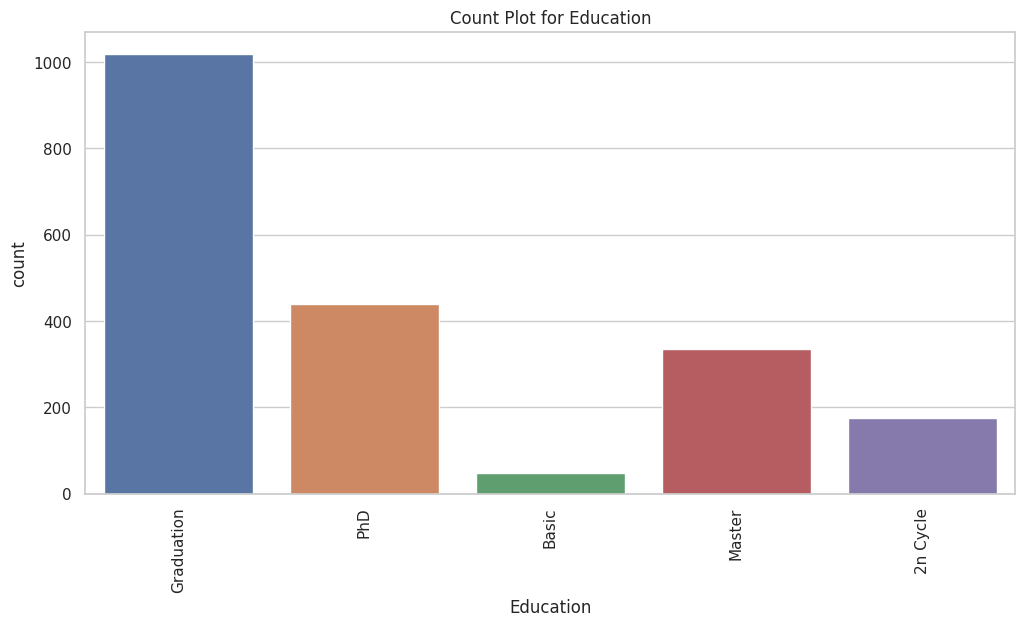

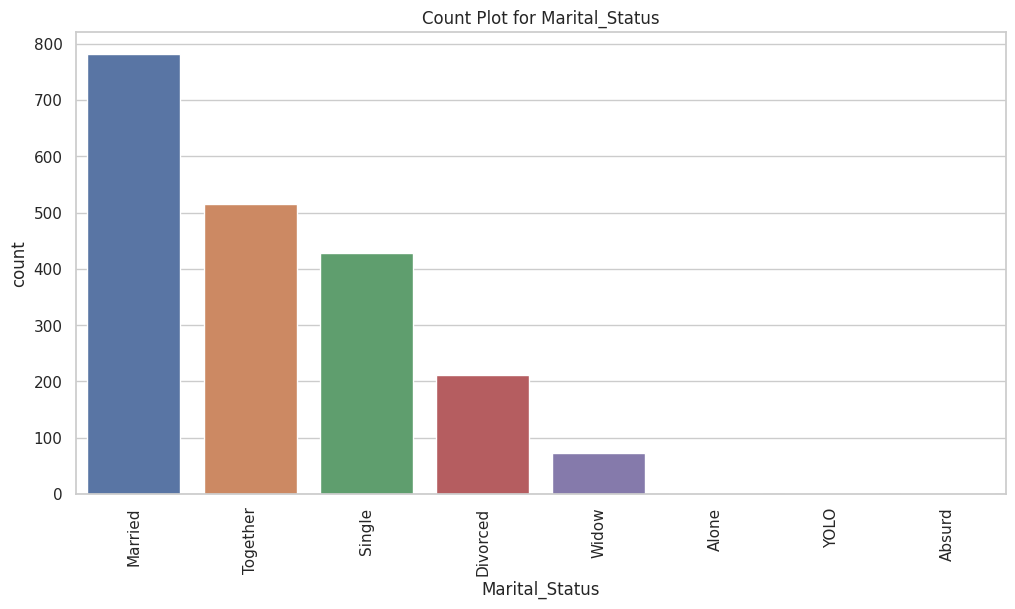

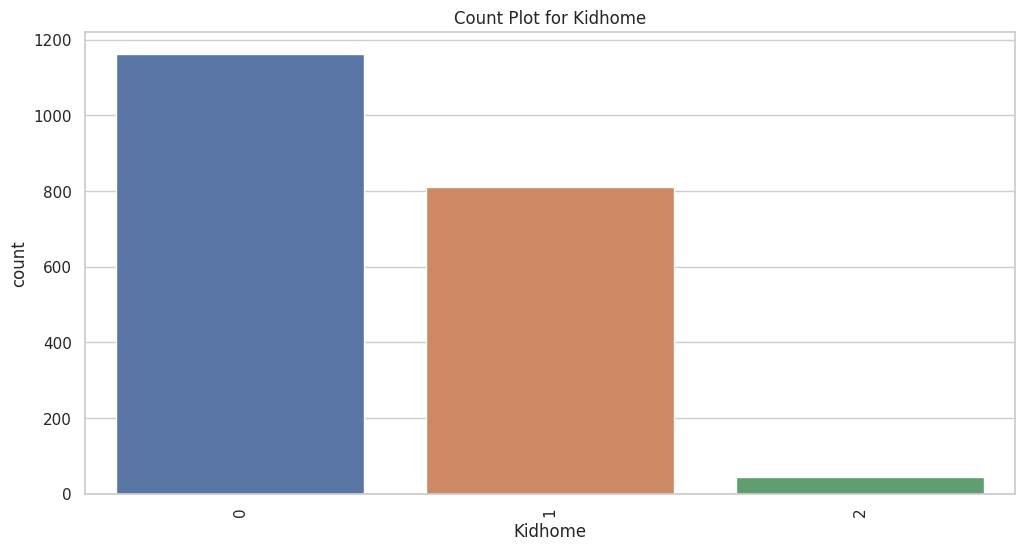

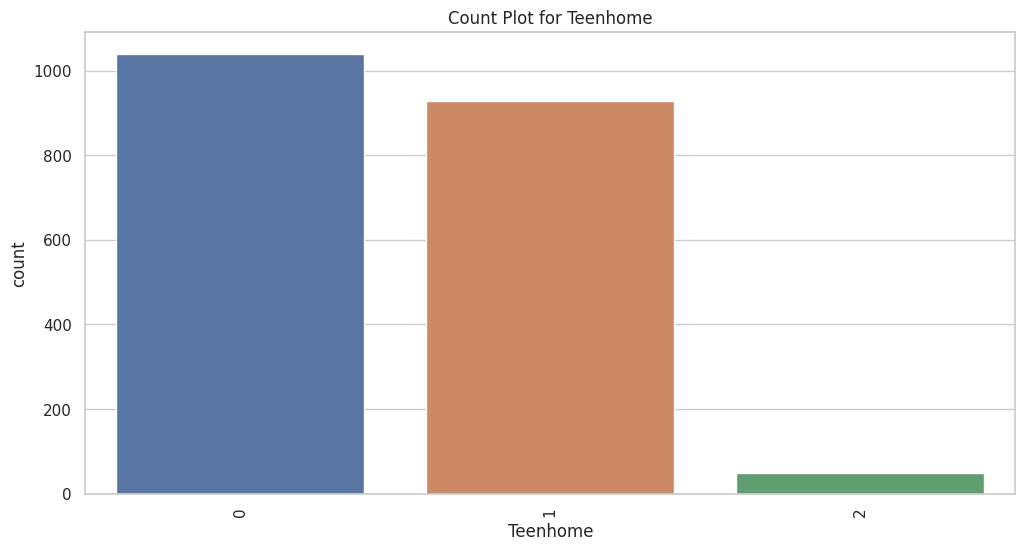

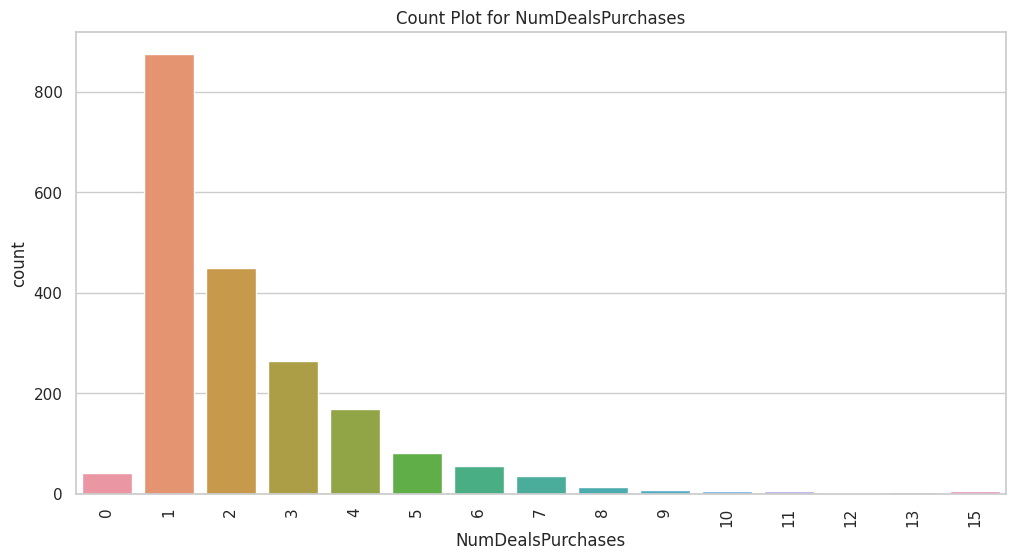

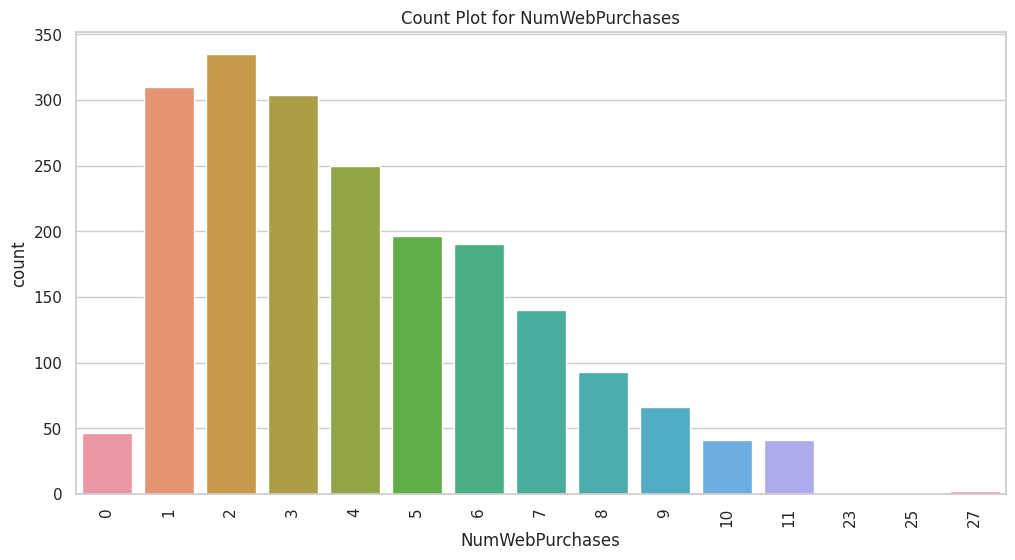

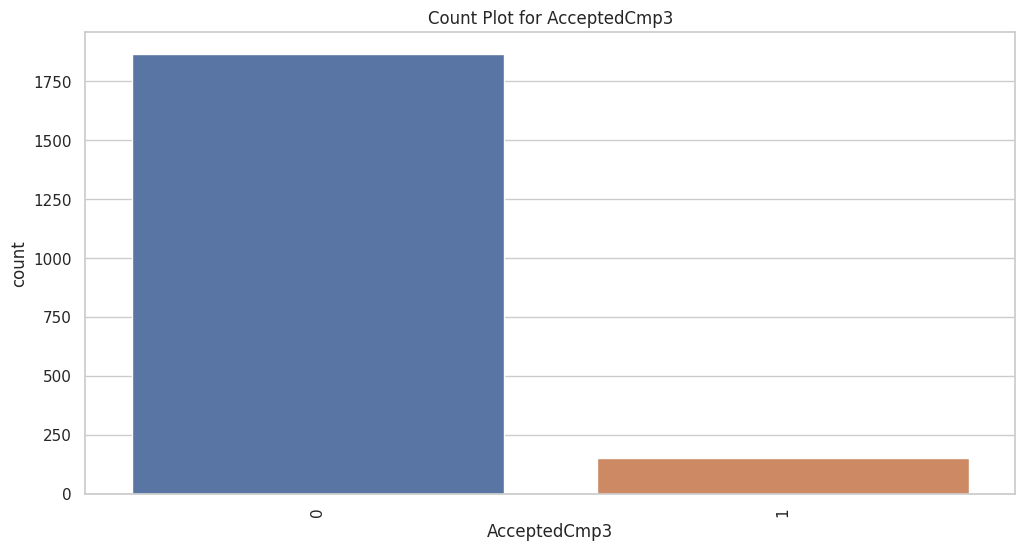

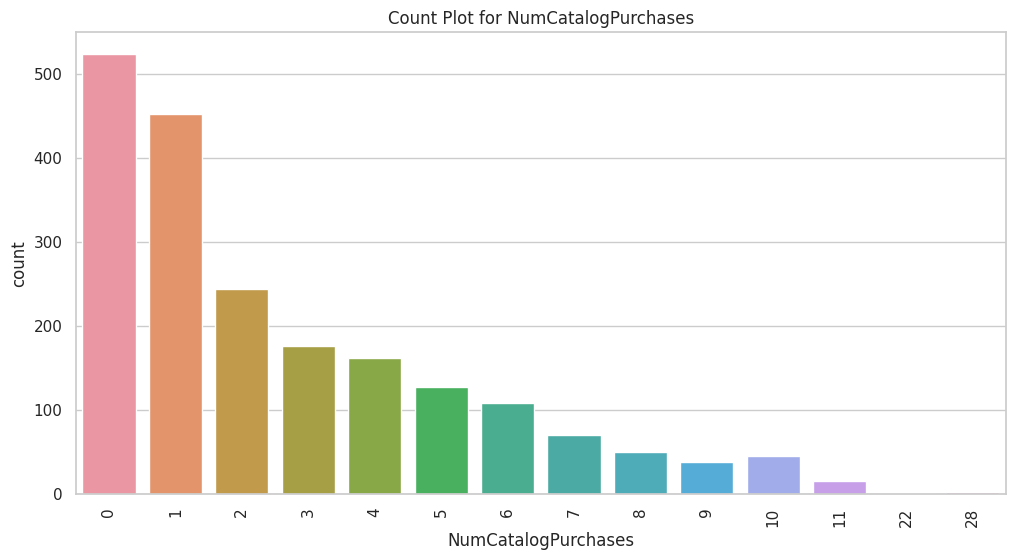

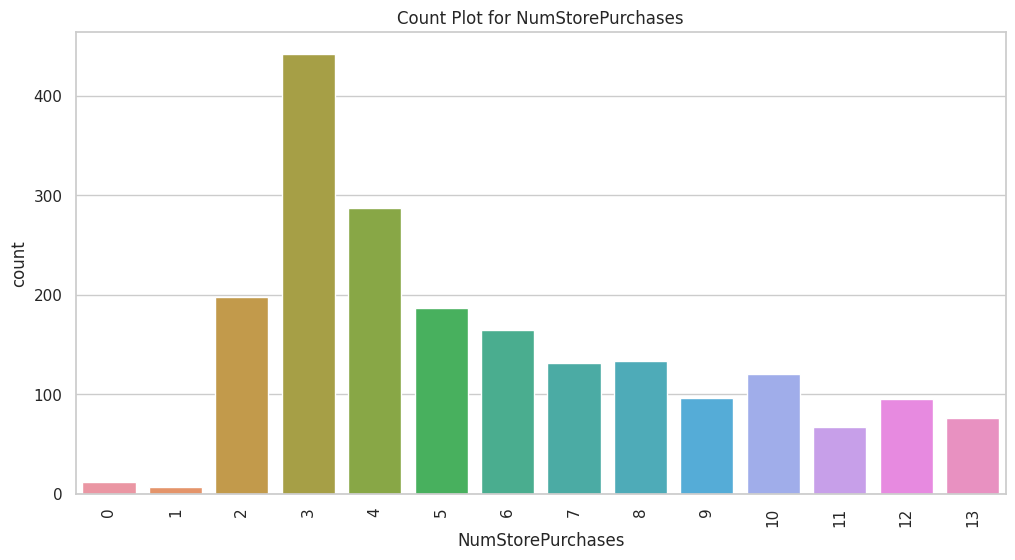

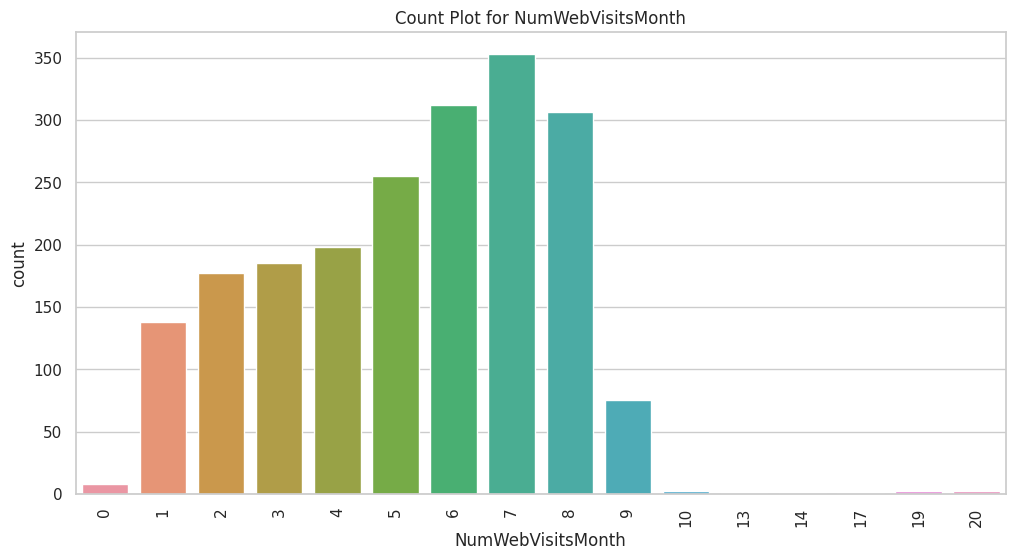

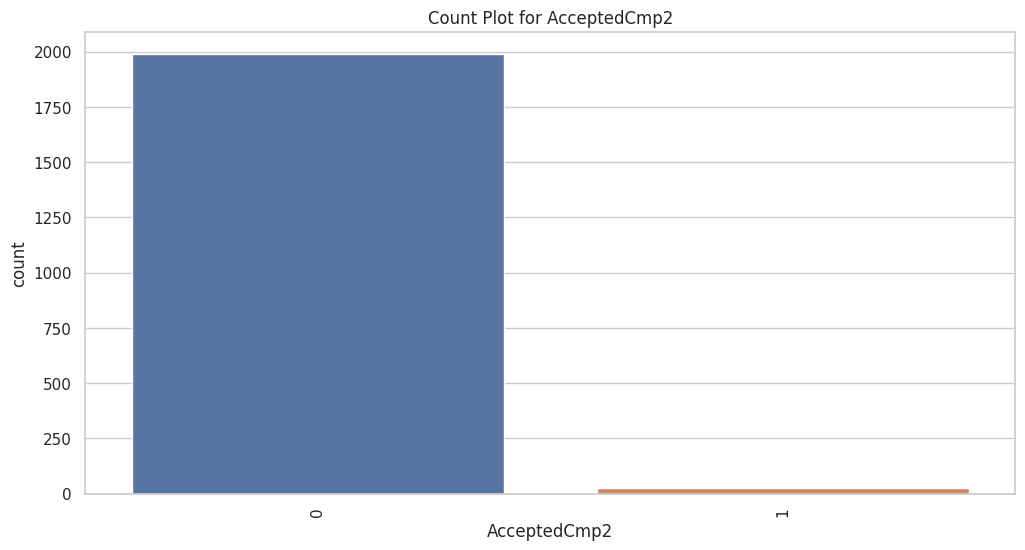

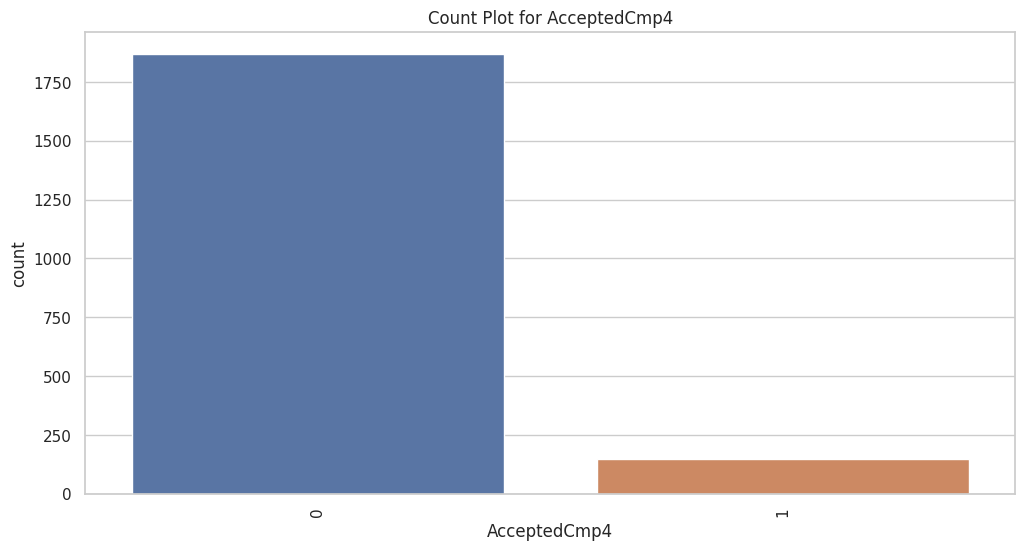

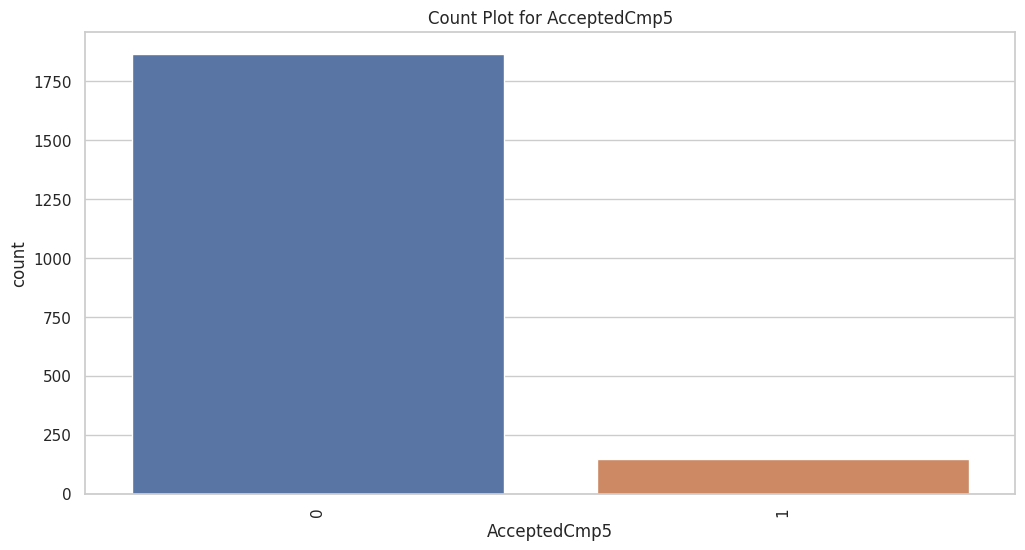

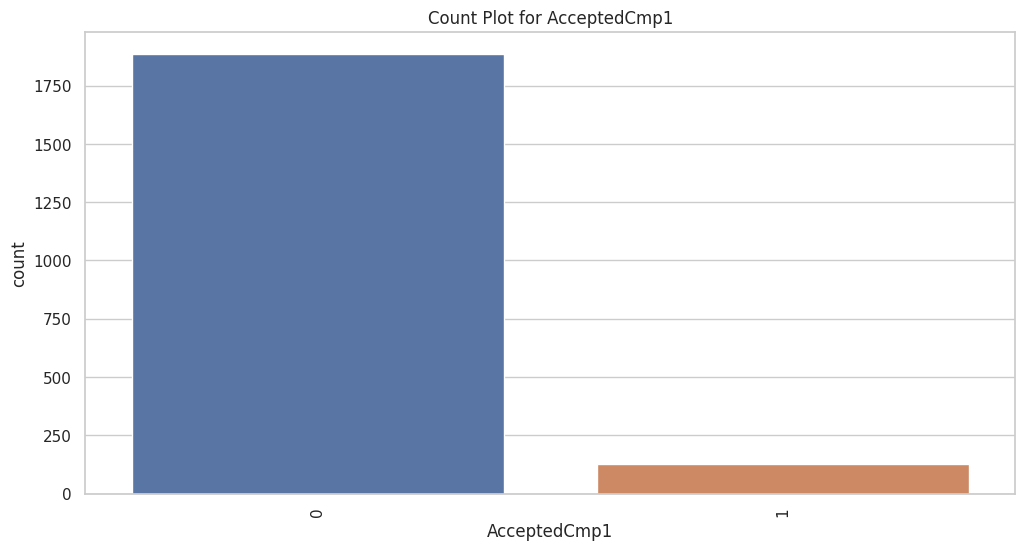

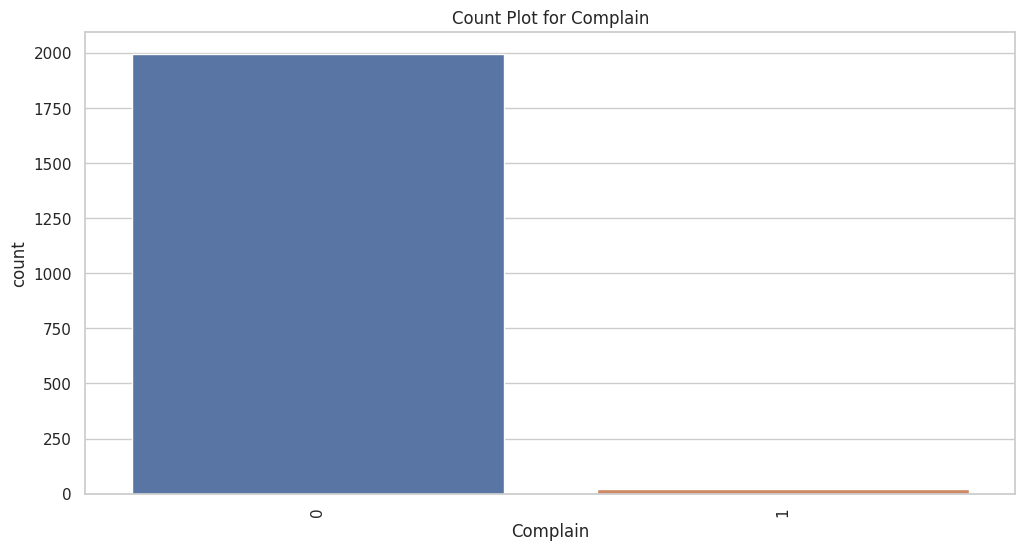

<Figure size 1200x600 with 0 Axes>

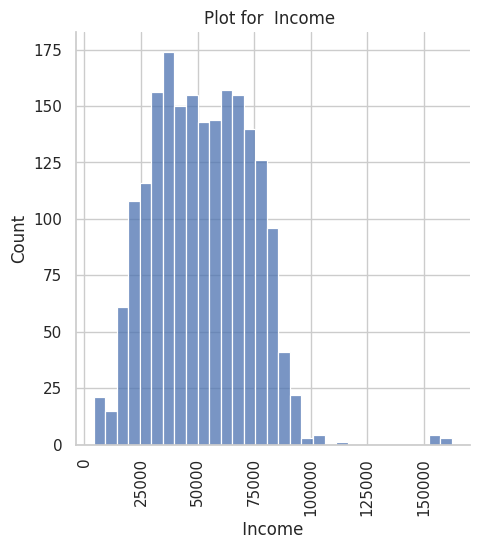

<Figure size 1200x600 with 0 Axes>

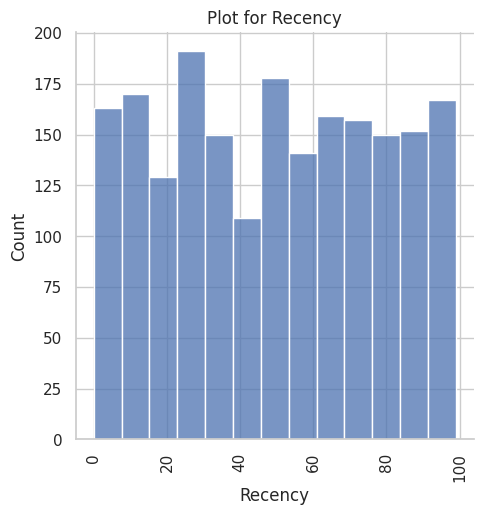

<Figure size 1200x600 with 0 Axes>

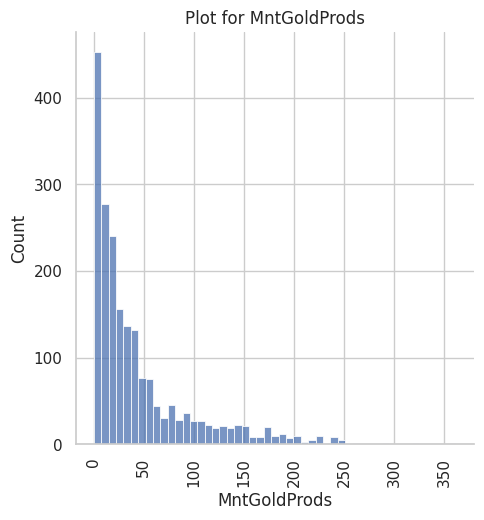

<Figure size 1200x600 with 0 Axes>

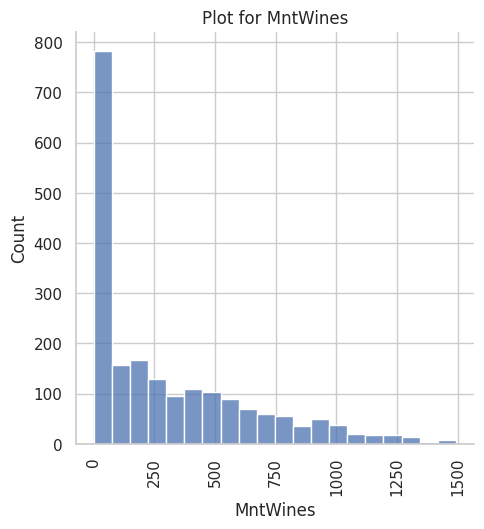

<Figure size 1200x600 with 0 Axes>

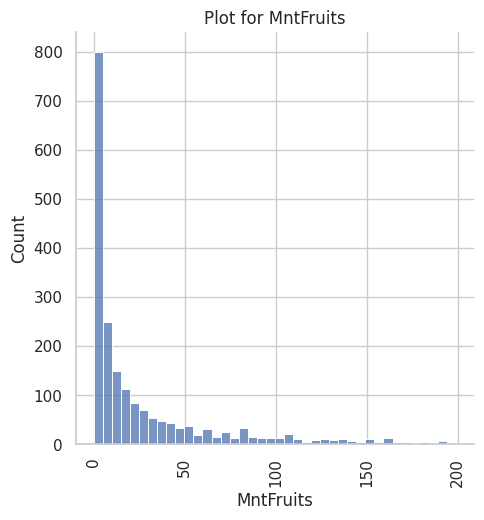

<Figure size 1200x600 with 0 Axes>

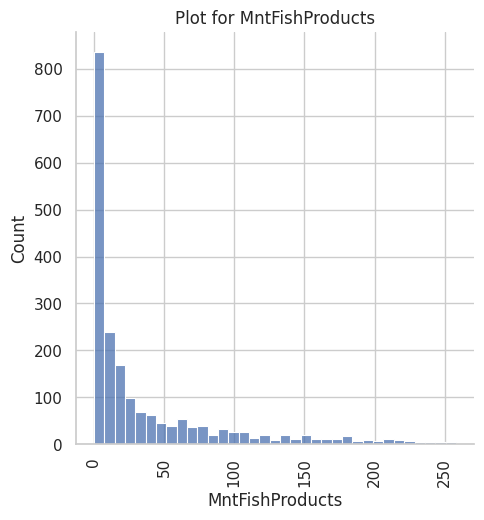

<Figure size 1200x600 with 0 Axes>

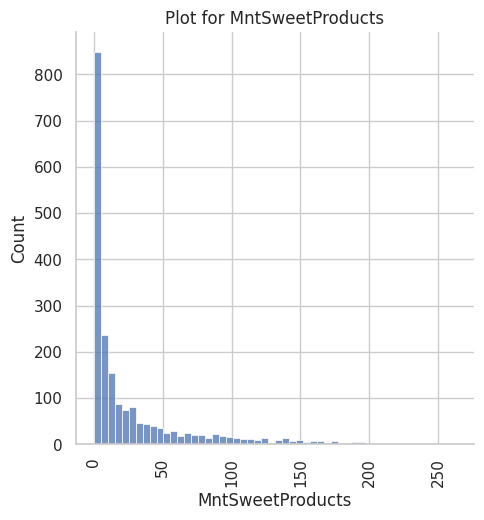

<Figure size 1200x600 with 0 Axes>

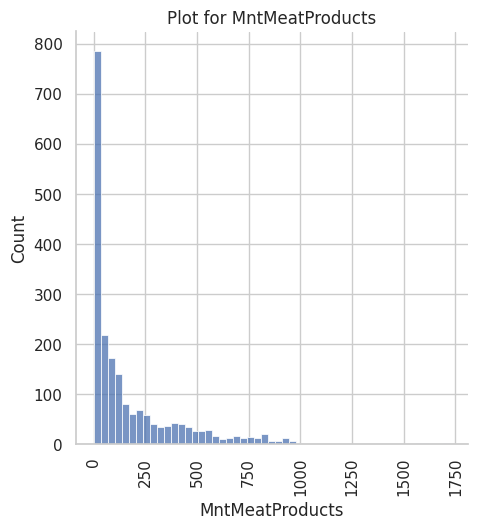

In [ ]:
# Using Seaborn Count Plot on single categorical variables
# Using Seaborn Dist Plot on features with huge varience which cannot be plotted using Count Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns for which count plots will be created
columns_to_plot1 = ['Education', 'Marital_Status', 'Kidhome',
                   'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'AcceptedCmp3',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'AcceptedCmp2', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                   'Complain']

# Create count plots for each column
for column in columns_to_plot1:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot for {column}')
    plt.xticks(rotation=90)
    plt.show()

columns_to_plot2 = [' Income ', 'Recency', 'MntGoldProds', 'MntWines',
                   'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntMeatProducts']

for column in columns_to_plot2:
    plt.figure(figsize=(12, 6))
    sns.displot(x=column, data=df)
    plt.title(f'Plot for {column}')
    plt.xticks(rotation=90)
    plt.show()


# Missing Values in Features

In [ ]:
# Since the total number of rows are 2016, by looking at the info, we can determine the number of features with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3    Income              1995 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Recency              2016 non-null   int64  
 7   MntGoldProds         2016 non-null   int64  
 8   MntWines             2016 non-null   int64  
 9   MntFruits            2016 non-null   int64  
 10  MntFishProducts      2016 non-null   int64  
 11  MntSweetProducts     2016 non-null   int64  
 12  MntMeatProducts      2016 non-null   int64  
 13  NumDealsPurchases    2016 non-null   int64  
 14  NumWebPurchases      2016 non-null   int64  
 15  AcceptedCmp3         2016 non-null   i

*Only the income column has missing values. We will, therefore, apply imputation techniques to that column.*

In [ ]:
# Obtaining the count of unique values in the Income column

income_counts = df[' Income '].value_counts()
print(income_counts)


7500.0     10
35860.0     4
39922.0     3
67445.0     3
18690.0     3
           ..
41120.0     1
75794.0     1
30545.0     1
20427.0     1
83528.0     1
Name:  Income , Length: 1798, dtype: int64


*I obtained the count to mainly check whether mode imputation might be a good option for my ML framework.Since the variance is high, mode will not be a good option for imputation.*

# Data Cleaning/ Feature Engineering


In [ ]:
print(df['Marital_Status'].value_counts())

Married     782
Together    516
Single      428
Divorced    212
Widow        72
Alone         2
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [ ]:
def marital_cleanup(status):
    if status == 'Alone' or status == 'Absurd' or status == 'YOLO':
        return 'Single'
    else:
        return status

df['Marital_Status'] = df['Marital_Status'].apply(marital_cleanup)





In [ ]:
df['Marital_Status'].value_counts()

Married     782
Together    516
Single      434
Divorced    212
Widow        72
Name: Marital_Status, dtype: int64

In [ ]:
print(df['Teenhome'].value_counts())

0    1040
1     927
2      49
Name: Teenhome, dtype: int64


In [ ]:
def teen_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

df['Teenhome'] = df['Teenhome'].apply(teen_cleanup)

In [ ]:
print(df['Teenhome'].value_counts())

0    1040
1     976
Name: Teenhome, dtype: int64


In [ ]:
print(df['Kidhome'].value_counts())

0    1163
1     810
2      43
Name: Kidhome, dtype: int64


In [ ]:
def kid_cleanup(status):
    if status == 2:
        return 1
    else:
        return status

df['Kidhome'] = df['Kidhome'].apply(kid_cleanup)

In [ ]:
print(df['Kidhome'].value_counts())

0    1163
1     853
Name: Kidhome, dtype: int64


# Imputing Missing Values

In [ ]:
#I am using the groupwise (according to education) mean technique as per sir's suggestion

import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Assuming 'Education' is the column representing the education feature
education_column = 'Education'

# Imputation strategies: 'knn', 'mean', 'median', 'mode', 'delete'
imputation_strategy = 'mean'  # Choose the desired strategy

# Select the 'Income' column for imputation
income_column = ' Income '

# Define imputer based on the chosen strategy
if imputation_strategy == 'knn':
    imputer = KNNImputer(n_neighbors=5)
else:
    imputer = SimpleImputer(strategy=imputation_strategy)

# Assuming 'df' is your DataFrame
# Group by 'Education', calculate the mean, and fill missing values in 'Income' column with the mean of the respective education class
df[income_column] = df.groupby(education_column)[income_column].transform(lambda x: x.fillna(x.mean()))

# Display the DataFrame after mean imputation
print(f"\nDataFrame after {imputation_strategy} imputation:")
print(df)



DataFrame after mean imputation:
      Year_Birth   Education Marital_Status   Income   Kidhome  Teenhome  \
0           1989  Graduation        Married   28691.0        1         0   
1           1981         PhD       Together   39665.0        1         0   
2           1975         PhD        Married   69283.0        0         1   
3           1969         PhD        Married   33581.0        1         0   
4           1993  Graduation         Single   72354.0        0         0   
...          ...         ...            ...       ...      ...       ...   
2011        1943      Master         Single   77598.0        0         0   
2012        1954         PhD        Married   62670.0        0         1   
2013        1981         PhD       Together   44953.0        0         0   
2014        1947  Graduation        Married   27469.0        0         0   
2015        1992  Graduation         Single   83528.0        0         0   

      Recency  MntGoldProds  MntWines  MntFruits  ...

In [ ]:
#Checking if all the missing values have been imputed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2016 non-null   int64  
 1   Education            2016 non-null   object 
 2   Marital_Status       2016 non-null   object 
 3    Income              2016 non-null   float64
 4   Kidhome              2016 non-null   int64  
 5   Teenhome             2016 non-null   int64  
 6   Recency              2016 non-null   int64  
 7   MntGoldProds         2016 non-null   int64  
 8   MntWines             2016 non-null   int64  
 9   MntFruits            2016 non-null   int64  
 10  MntFishProducts      2016 non-null   int64  
 11  MntSweetProducts     2016 non-null   int64  
 12  MntMeatProducts      2016 non-null   int64  
 13  NumDealsPurchases    2016 non-null   int64  
 14  NumWebPurchases      2016 non-null   int64  
 15  AcceptedCmp3         2016 non-null   i

# Encoding Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'Education' and 'Marital_Status' are categorical columns
categorical_columns = ['Education', 'Marital_Status']

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse=False)

# Encode the categorical columns
onehot_encoded = onehot_encoder.fit_transform(df[categorical_columns])

# Create new column names for the one-hot-encoded features
new_column_names = [f"{col}_{val}" for col, values in zip(categorical_columns, onehot_encoder.categories_) for val in values[1:]]

# Create a DataFrame with the one-hot-encoded features
df_encoded = pd.DataFrame(onehot_encoded, columns=new_column_names)

# Concatenate the encoded features back to the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns
df.drop(categorical_columns, axis=1, inplace=True)

print(df)


      Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  \
0           1989   28691.0        1         0       56             4   
1           1981   39665.0        1         0       97            31   
2           1975   69283.0        0         1       41             8   
3           1969   33581.0        1         0       38             1   
4           1993   72354.0        0         0       67           182   
...          ...       ...      ...       ...      ...           ...   
2011        1943   77598.0        0         0       53            33   
2012        1954   62670.0        0         1       57            38   
2013        1981   44953.0        0         0       31           124   
2014        1947   27469.0        0         0        2             0   
2015        1992   83528.0        0         0        7           147   

      MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  \
0            5          4                8                 0  ... 

# Feature Selection using Correlational Matrix

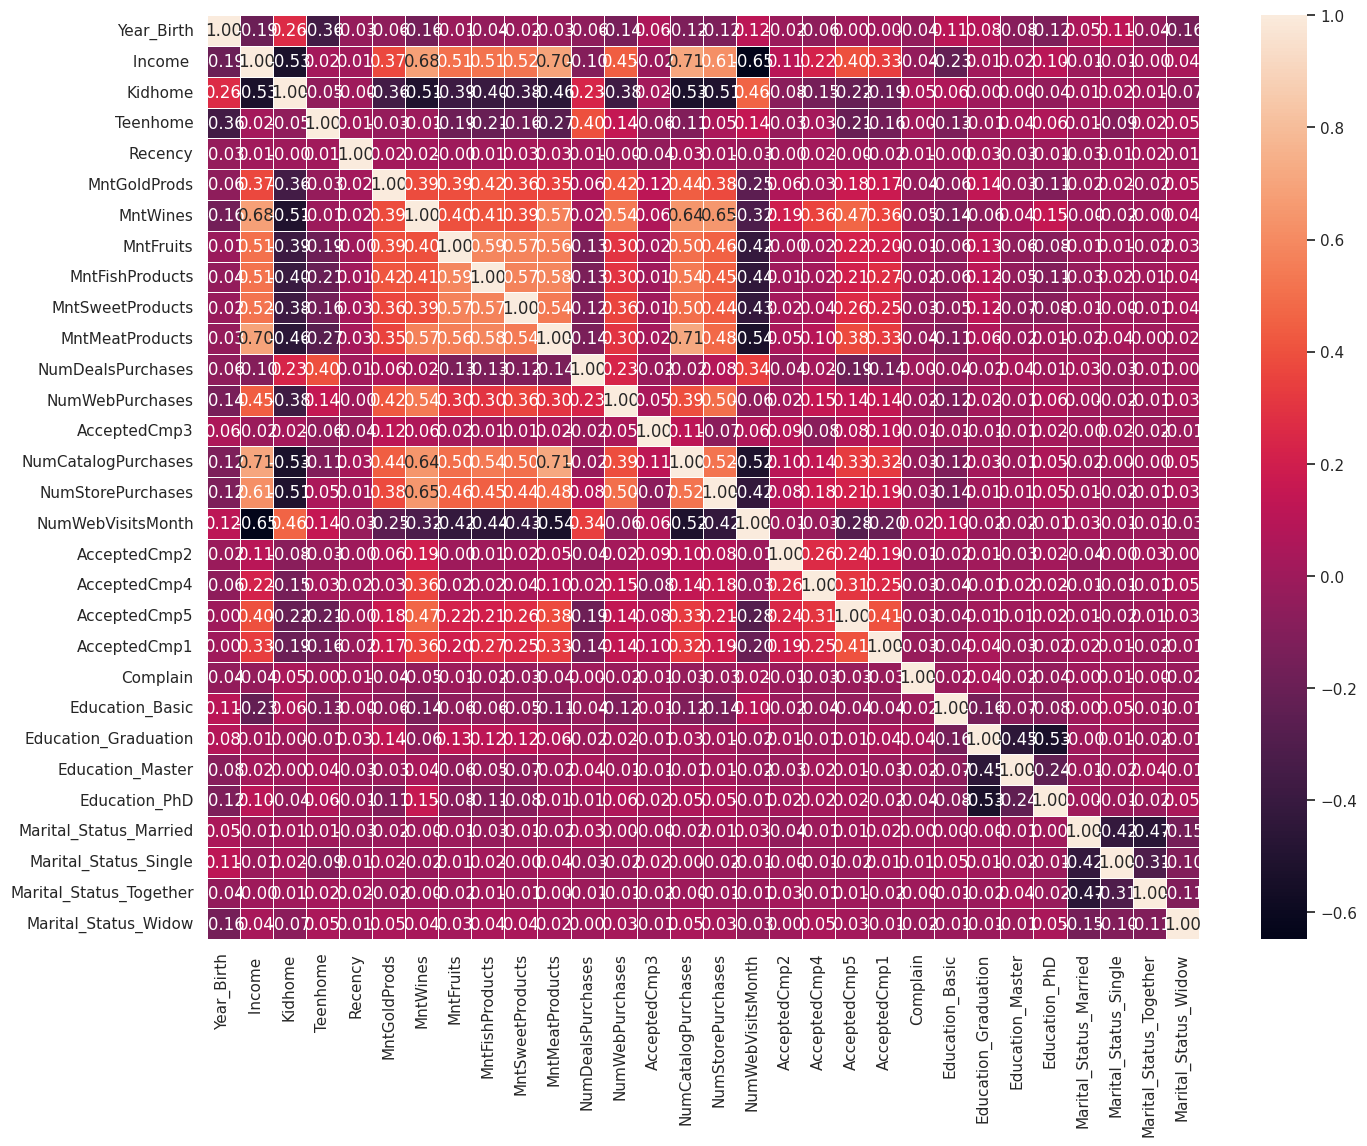

   Year_Birth   Income   Kidhome  Teenhome  Recency  MntGoldProds  MntWines  \
0        1989   28691.0        1         0       56             4         5   
1        1981   39665.0        1         0       97            31       127   
2        1975   69283.0        0         1       41             8       674   
3        1969   33581.0        1         0       38             1        11   
4        1993   72354.0        0         0       67           182       315   

   MntFruits  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  Complain  \
0          4                8                 0  ...             0         0   
1          1                0                 1  ...             0         0   
2         62                0                26  ...             0         0   
3          0                0                 0  ...             0         0   
4         26              220                12  ...             0         0   

   Education_Basic  Education_Graduation  Ed

In [ ]:
#To see the heatmap of the features to check correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)

plt.show()

# Set the correlation threshold (adjust as needed)
correlation_threshold = 0.7

# Identify features with high correlation
high_corr_features = set()
corr_matrix = df.corr().abs()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

# Remove features exceeding the correlation threshold
df = df.drop(columns=high_corr_features)

# Display the updated dataset
print(df.head())

# Scaling the Data

In [ ]:
# Scaling the whole data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = scaler.fit_transform(df)
x = pd.DataFrame(dataset, columns=df.columns)


In [ ]:
print(x)

      Year_Birth   Income   Kidhome  Teenhome   Recency  MntGoldProds  \
0       0.932039  0.155758      1.0       0.0  0.565657      0.011050   
1       0.854369  0.225050      1.0       0.0  0.979798      0.085635   
2       0.796117  0.412063      0.0       1.0  0.414141      0.022099   
3       0.737864  0.186634      1.0       0.0  0.383838      0.002762   
4       0.970874  0.431453      0.0       0.0  0.676768      0.502762   
...          ...       ...      ...       ...       ...           ...   
2011    0.485437  0.464565      0.0       0.0  0.535354      0.091160   
2012    0.592233  0.370307      0.0       1.0  0.575758      0.104972   
2013    0.854369  0.258439      0.0       0.0  0.313131      0.342541   
2014    0.524272  0.148042      0.0       0.0  0.020202      0.000000   
2015    0.961165  0.502008      0.0       0.0  0.070707      0.406077   

      MntWines  MntFruits  MntFishProducts  MntSweetProducts  ...  \
0     0.003349   0.020101         0.031008          0.

In [ ]:
# Check unique values in y
unique_values_y = set(labels)
print("Unique values in y:", unique_values_y)

# Check data type of y
data_type_y = type(labels)
print("Data type of y:", data_type_y)

# Inspect a few rows of y
print("Sample of y:")
print(labels.head())


Unique values in y: {0, 1}
Data type of y: <class 'pandas.core.series.Series'>
Sample of y:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


# Model Fitting


In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, labels, test_size=0.2, random_state=11)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Assuming you have already split your data into X_train, X_test, Y_train, Y_test

# Define the classifiers and their parameter grids
classifiers = {
    'Gaussian Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'RandomForestClassifier': RandomForestClassifier(class_weight='balanced'),
    'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(class_weight='balanced')
}

param_grids = {
    'Gaussian Naive Bayes': {'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]},
    'KNeighborsClassifier': {'classifier__n_neighbors': [5, 7, 9, 11, 18, 30], 'classifier__leaf_size': [1, 5, 10, 20, 30],
                             'classifier__p': [1, 2], 'classifier__weights': ['uniform', 'distance'], 'classifier__metric': ['minkowski', 'chebyshev']},
    'Logistic Regression': {'classifier__penalty': ['l1', 'l2'], 'classifier__C': [0.01, 0.1, 1, 10, 100]},
    'RandomForestClassifier': {'classifier__n_estimators': [100, 140, 180, 200],
                               'classifier__max_features': ['auto', 'sqrt'],
                               'classifier__max_depth': [10, 20, 30, None],
                               'classifier__min_samples_split': [2, 5, 10],
                               'classifier__min_samples_leaf': [1, 2, 4, 10],
                               'classifier__bootstrap': [True, False]},
    'DecisionTreeClassifier': {'classifier__max_depth': [3, 7, 10, 15, 20],
                               'classifier__criterion': ['gini', 'entropy'],
                               'classifier__max_features': ['auto', 'sqrt', 'log2'],
                               'classifier__min_samples_split': [2, 4, 6]},
    'GradientBoostingClassifier': {'classifier__max_depth': [3, 5, 7, 9],
                                   'classifier__min_samples_split': [2, 5, 10, 20],
                                   'classifier__min_samples_leaf': [1, 2, 4, 10],
                                   'classifier__n_estimators': [50, 100, 150, 200]},
    'AdaBoostClassifier': {'classifier__n_estimators': [50, 100, 150, 200],
                           'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0]},
    'SVC': {'classifier__C': [0.1, 1, 10, 100],
            'classifier__gamma': [1, 0.1, 0.01, 0.001],
            'classifier__kernel': ['rbf', 'sigmoid', 'linear', 'poly']}
}

# Create the pipeline
def build_pipeline(classifier):
    return Pipeline([
        ('classifier', classifier)
    ])

# Store the results for each classifier
results = {}

# Train and tune the models
for name, classifier in classifiers.items():
    pipeline = build_pipeline(classifier)
    param_grid = param_grids[name]

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, Y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    f1_macro = f1_score(Y_test, y_pred, average='macro')
    precision = precision_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    best_parameters = grid_search.best_params_  # Add this line

    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(f"Precision for {name}: {precision:.4f}")
    print(f"Recall for {name}: {recall:.4f}")
    print(f"Macro F1 Score for {name}: {f1_macro:.4f}")
    print(f"Best Parameters for {name}: {best_parameters}")  # Add this line
    print("----------------------------------------")

    # Classification report
    report = classification_report(Y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}")

    # Store the results
    results[name] = {
        'best_params': grid_search.best_params_,
        'f1_macro': f1_macro,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy
    }

# Find the best model based on f1_macro
best_model_name = max(results, key=lambda x: results[x]['f1_macro'])
best_model_result = results[best_model_name]

# Print the best overall model
print("\nBest Overall Model:")
print(f"Model: {best_model_name}")
print(f"Best parameters: {best_model_result['best_params']}")
print(f"Accuracy: {best_model_result['accuracy']:.4f}")
print(f"F1 Macro: {best_model_result['f1_macro']:.4f}")



Accuracy for Gaussian Naive Bayes: 0.8144
Precision for Gaussian Naive Bayes: 0.6690
Recall for Gaussian Naive Bayes: 0.7259
Macro F1 Score for Gaussian Naive Bayes: 0.6882
Best Parameters for Gaussian Naive Bayes: {'classifier__var_smoothing': 1e-09}
----------------------------------------
Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       344
           1       0.41      0.60      0.49        60

    accuracy                           0.81       404
   macro avg       0.67      0.73      0.69       404
weighted avg       0.85      0.81      0.83       404

Accuracy for KNeighborsClassifier: 0.8540
Precision for KNeighborsClassifier: 0.7016
Recall for KNeighborsClassifier: 0.6391
Macro F1 Score for KNeighborsClassifier: 0.6604
Best Parameters for KNeighborsClassifier: {'classifier__leaf_size': 1, 'classifier__metric': 'minkowski', 'classifier__n_neighbors': 5, 'classifier__p': 1, 'cl